# Gender Prediction System with Ecommerce Data


importing all the necessary libraries

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

Loading the training dataset

In [2]:
#path='data/'
train_data = pd.read_csv('/Users/haarinikavin/Downloads/trainingData.csv',header=None,
                         parse_dates=[1, 2], 
                         names=['Session_ID', 'StartTime', 'EndTime', 'Categories'])
train_label = pd.read_csv('/Users/haarinikavin/Downloads/trainingLabels.csv', header=None)
train_data['Gender'] = (train_label[0].values == 'female').astype(np.float64)

In [3]:
train_data

,Session_ID,StartTime,EndTime,Categories,Gender
0,u10001,2014-11-14 00:02:14,2014-11-14 00:02:20,A00001/B00001/C00001/D00001/,1.0
1,u10002,2014-12-12 14:12:05,2014-12-12 14:12:06,A00002/B00002/C00002/D24897/,1.0
2,u10003,2014-11-14 00:02:41,2014-11-14 00:16:40,A00002/B00002/C00002/D00002/;A00002/B00002/C00...,1.0
3,u10004,2014-11-14 00:21:55,2014-11-14 00:21:57,A00002/B00006/C00015/D00030/,1.0
4,u10005,2014-11-14 00:26:08,2014-11-14 00:29:25,A00002/B00002/C00003/D00033/;A00002/B00002/C00...,1.0
...,...,...,...,...,...
14995,u24996,2014-12-22 22:31:38,2014-12-22 22:35:29,A00002/B00002/C00007/D20565/;A00002/B00002/C00...,1.0
14996,u24997,2014-12-22 22:52:11,2014-12-22 22:53:19,A00002/B00002/C00002/D15648/;A00002/B00002/C00...,1.0
14997,u24998,2014-12-22 22:58:58,2014-12-22 22:59:00,A00002/B00002/C00007/D36054/,1.0
14998,u24999,2014-12-22 23:03:45,2014-12-22 23:03:50,A00002/B00002/C00007/D08424/,1.0


Exploring the data

In [4]:
train_data.head()

,Session_ID,StartTime,EndTime,Categories,Gender
0,u10001,2014-11-14 00:02:14,2014-11-14 00:02:20,A00001/B00001/C00001/D00001/,1.0
1,u10002,2014-12-12 14:12:05,2014-12-12 14:12:06,A00002/B00002/C00002/D24897/,1.0
2,u10003,2014-11-14 00:02:41,2014-11-14 00:16:40,A00002/B00002/C00002/D00002/;A00002/B00002/C00...,1.0
3,u10004,2014-11-14 00:21:55,2014-11-14 00:21:57,A00002/B00006/C00015/D00030/,1.0
4,u10005,2014-11-14 00:26:08,2014-11-14 00:29:25,A00002/B00002/C00003/D00033/;A00002/B00002/C00...,1.0


In [5]:
train_data.columns

Index(['Session_ID', 'StartTime', 'EndTime', 'Categories', 'Gender'], dtype='object')

In [6]:
from collections import defaultdict
distri_cat = {'A':{},'B':{},'C':{},'D':{}}
for row in train_data['Categories']:
    splited = row.split(',')
    for click in splited[-1].split(';'):
        click_split = click.split('/')[:-1]
        distri_cat['A'][click_split[0]]= distri_cat['A'].get(click_split[0],0) + 1
        distri_cat['B'][click_split[1]]= distri_cat['B'].get(click_split[1],0) + 1
        distri_cat['C'][click_split[2]]= distri_cat['C'].get(click_split[2],0) + 1
        distri_cat['D'][click_split[3]]= distri_cat['D'].get(click_split[3],0) + 1

In [7]:
def show_distribution_cat(distri_cat, level_type, rotation = 30, size = (10,5), visual_type='bar'):
    sorted_freq = sorted(distri_cat[level_type].items(), key=lambda x: x[1])
    cat_list, freq_list=map(list,list(zip(*sorted_freq)))
    plt.figure(figsize = size)
    if visual_type =='bar':
        ax = sns.barplot(x=cat_list, y=freq_list)
        ax.set(title='Bar Frequency for category level '+level_type, xlabel='Category', ylabel='Frequency')
        ax.bar_label(ax.containers[0], label_type='edge')
        ax.set_xticklabels(ax.get_xticklabels(),rotation = rotation)
    else:
        ax = sns.histplot(data=freq_list, bins=50)
        ax.set(title='Histogram Frequency for category level '+level_type, xlabel='Category', ylabel='Frequency')
    plt.show()

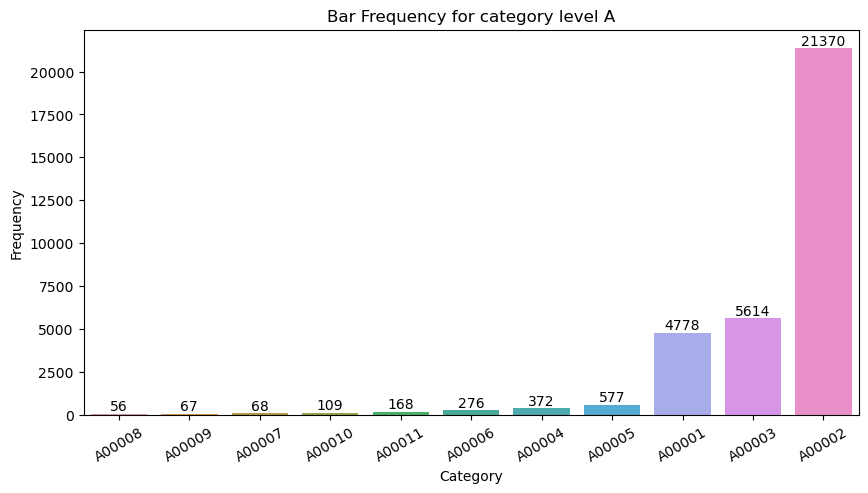

In [8]:
show_distribution_cat(distri_cat, 'A')

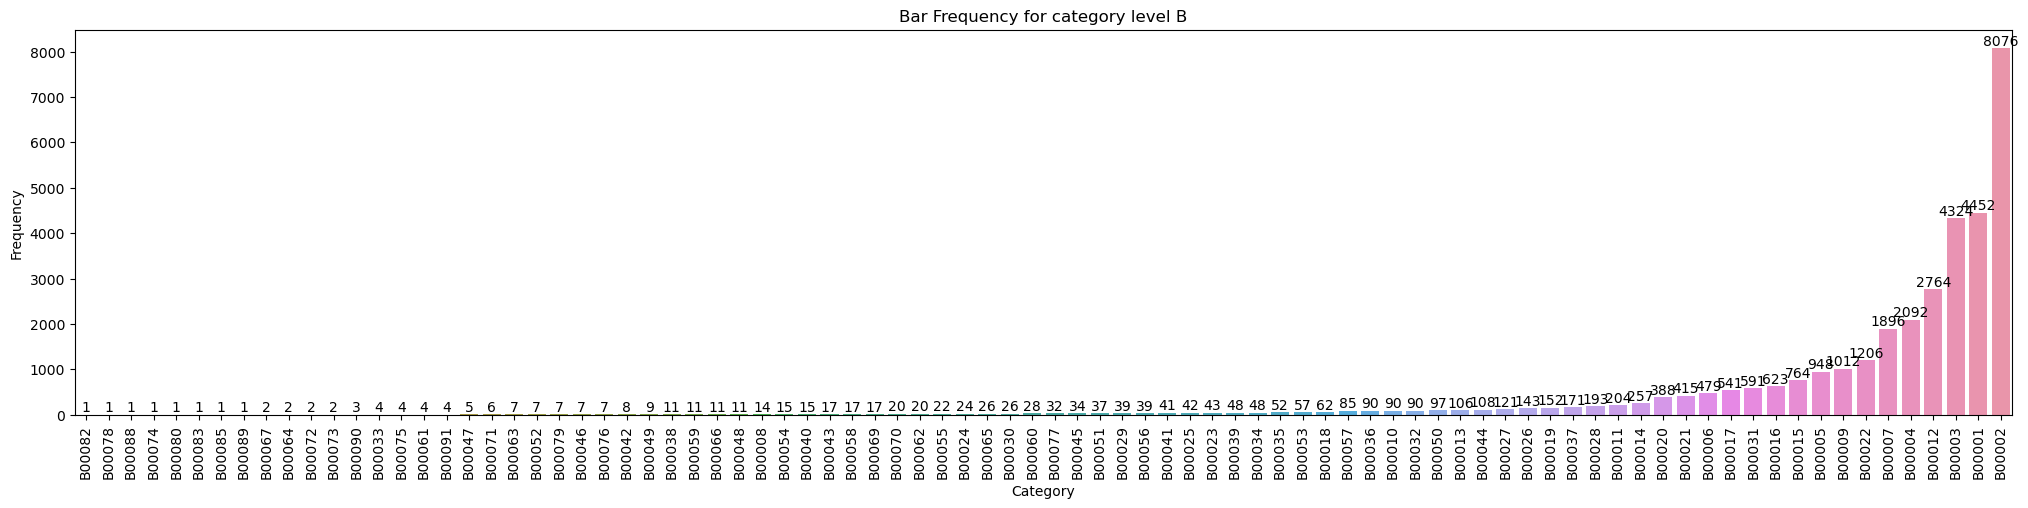

In [9]:
show_distribution_cat(distri_cat, 'B', 90, (25,5))

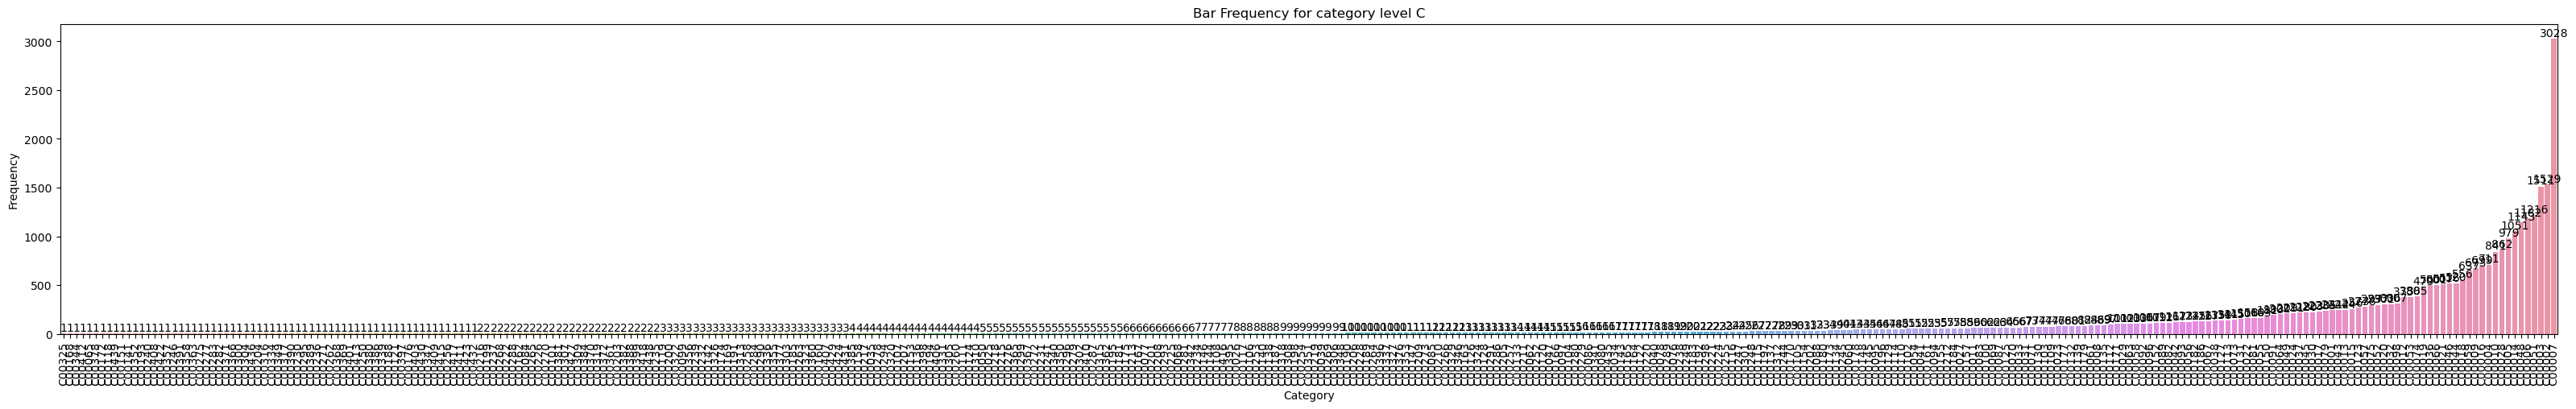

In [10]:
show_distribution_cat(distri_cat, 'C', 90,(40,5))

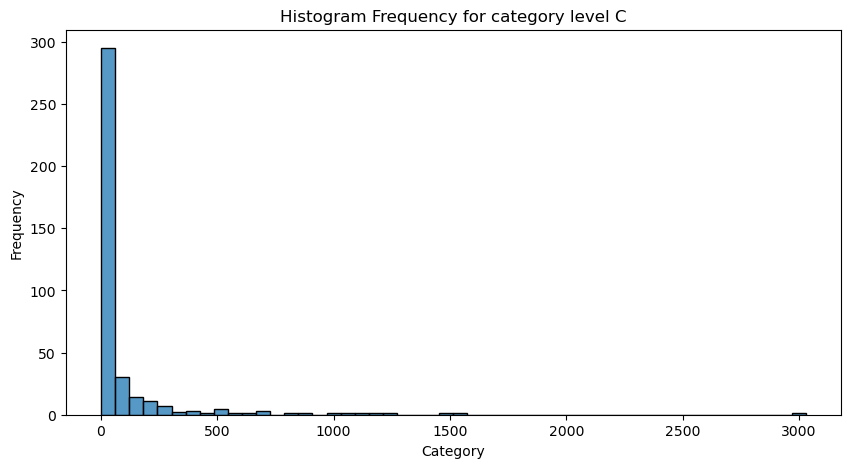

In [11]:
show_distribution_cat(distri_cat, 'C', 90,(10,5), 'hist')

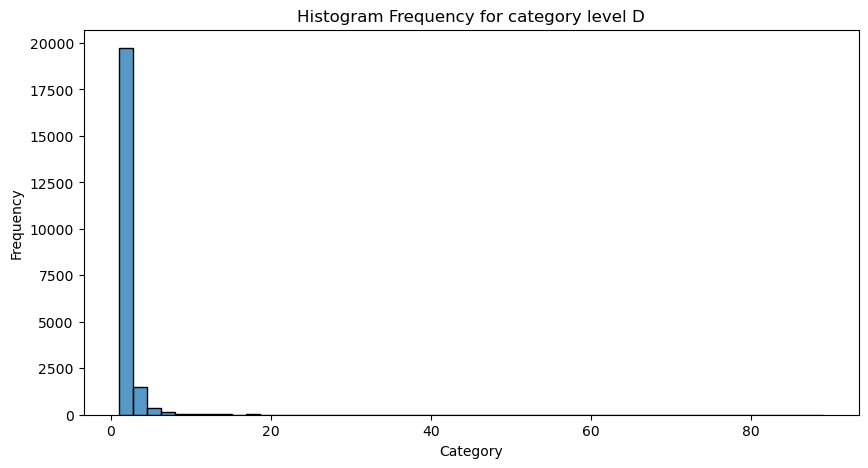

In [12]:
show_distribution_cat(distri_cat, 'D', 90, (10,5), 'hist')

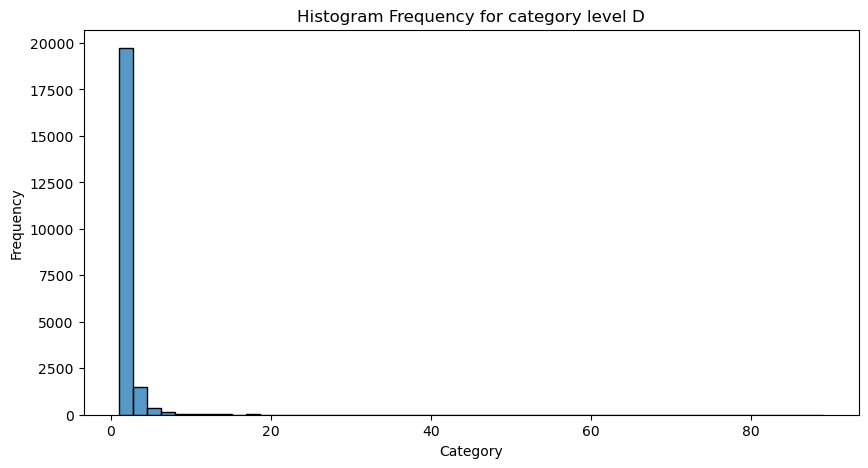

In [13]:
show_distribution_cat(distri_cat, 'D', 90, (10,5), 'hist')

In [14]:
print(len(distri_cat['A']))
print(len(distri_cat['B']))
print(len(distri_cat['C']))
print(len(distri_cat['D']))

11
86
383
21880


In [15]:
train_data['Gender'].value_counts()

1.0    11703
0.0     3297
Name: Gender, dtype: int64

notice that there are 11703 females(1) and 3297 males(0), so this dataset is unbalanced.

### preprocessing

given session ID is in string format, hence converting it into integer.

In [16]:
train_data['Session_ID'] = train_data['Session_ID'].str[1:].astype(int)

In [17]:
train_data

,Session_ID,StartTime,EndTime,Categories,Gender
0,10001,2014-11-14 00:02:14,2014-11-14 00:02:20,A00001/B00001/C00001/D00001/,1.0
1,10002,2014-12-12 14:12:05,2014-12-12 14:12:06,A00002/B00002/C00002/D24897/,1.0
2,10003,2014-11-14 00:02:41,2014-11-14 00:16:40,A00002/B00002/C00002/D00002/;A00002/B00002/C00...,1.0
3,10004,2014-11-14 00:21:55,2014-11-14 00:21:57,A00002/B00006/C00015/D00030/,1.0
4,10005,2014-11-14 00:26:08,2014-11-14 00:29:25,A00002/B00002/C00003/D00033/;A00002/B00002/C00...,1.0
...,...,...,...,...,...
14995,24996,2014-12-22 22:31:38,2014-12-22 22:35:29,A00002/B00002/C00007/D20565/;A00002/B00002/C00...,1.0
14996,24997,2014-12-22 22:52:11,2014-12-22 22:53:19,A00002/B00002/C00002/D15648/;A00002/B00002/C00...,1.0
14997,24998,2014-12-22 22:58:58,2014-12-22 22:59:00,A00002/B00002/C00007/D36054/,1.0
14998,24999,2014-12-22 23:03:45,2014-12-22 23:03:50,A00002/B00002/C00007/D08424/,1.0


#### Time Columns

- DaysofMonth (30)
- Month (12)
- DayofWeek (7)
- StartHour (24)
- EndHour (24)
- Duration (1)
- NoOfProducts (1)
- AverageTimePerProduct (1)

In [18]:
train_data['DayOfWeek']=train_data["StartTime"].dt.dayofweek
train_data['Month']=train_data["StartTime"].dt.month
train_data['Day']=train_data["StartTime"].dt.day
train_data['StartHour'] = train_data["StartTime"].dt.hour
train_data['EndHour'] = train_data["EndTime"].dt.hour
train_data['Duration'] = (train_data["EndTime"] - train_data["StartTime"]).dt.total_seconds()
train_data['NoOfProducts'] = train_data['Categories'].str.count(";")+1
train_data['AverageTimePerProduct'] = train_data['Duration']/train_data['NoOfProducts']

In [19]:
train_data

,Session_ID,StartTime,EndTime,Categories,Gender,DayOfWeek,Month,Day,StartHour,EndHour,Duration,NoOfProducts,AverageTimePerProduct
0,10001,2014-11-14 00:02:14,2014-11-14 00:02:20,A00001/B00001/C00001/D00001/,1.0,4,11,14,0,0,6.0,1,6.000000
1,10002,2014-12-12 14:12:05,2014-12-12 14:12:06,A00002/B00002/C00002/D24897/,1.0,4,12,12,14,14,1.0,1,1.000000
2,10003,2014-11-14 00:02:41,2014-11-14 00:16:40,A00002/B00002/C00002/D00002/;A00002/B00002/C00...,1.0,4,11,14,0,0,839.0,12,69.916667
3,10004,2014-11-14 00:21:55,2014-11-14 00:21:57,A00002/B00006/C00015/D00030/,1.0,4,11,14,0,0,2.0,1,2.000000
4,10005,2014-11-14 00:26:08,2014-11-14 00:29:25,A00002/B00002/C00003/D00033/;A00002/B00002/C00...,1.0,4,11,14,0,0,197.0,3,65.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24996,2014-12-22 22:31:38,2014-12-22 22:35:29,A00002/B00002/C00007/D20565/;A00002/B00002/C00...,1.0,0,12,22,22,22,231.0,3,77.000000
14996,24997,2014-12-22 22:52:11,2014-12-22 22:53:19,A00002/B00002/C00002/D15648/;A00002/B00002/C00...,1.0,0,12,22,22,22,68.0,4,17.000000
14997,24998,2014-12-22 22:58:58,2014-12-22 22:59:00,A00002/B00002/C00007/D36054/,1.0,0,12,22,22,22,2.0,1,2.000000
14998,24999,2014-12-22 23:03:45,2014-12-22 23:03:50,A00002/B00002/C00007/D08424/,1.0,0,12,22,23,23,5.0,1,5.000000


In [20]:
for i in train_data.columns:
    print(i, '\t', train_data[i].unique())

Session_ID 	 [10001 10002 10003 ... 24998 24999 25000]
StartTime 	 ['2014-11-14T00:02:14.000000000' '2014-12-12T14:12:05.000000000'
 '2014-11-14T00:02:41.000000000' ... '2014-12-22T22:58:58.000000000'
 '2014-12-22T23:03:45.000000000' '2014-12-22T22:34:33.000000000']
EndTime 	 ['2014-11-14T00:02:20.000000000' '2014-12-12T14:12:06.000000000'
 '2014-11-14T00:16:40.000000000' ... '2014-12-22T22:59:00.000000000'
 '2014-12-22T23:03:50.000000000' '2014-12-22T22:34:41.000000000']
Categories 	 ['A00001/B00001/C00001/D00001/' 'A00002/B00002/C00002/D24897/'
 'A00002/B00002/C00002/D00002/;A00002/B00002/C00003/D00003/;A00002/B00002/C00007/D00007/;A00002/B00002/C00002/D00009/;A00002/B00002/C00003/D00010/;A00002/B00002/C00007/D00011/;A00002/B00002/C00002/D00012/;A00002/B00002/C00007/D00014/;A00002/B00002/C00003/D00017/;A00002/B00002/C00011/D00021/;A00002/B00002/C00004/D00023/;A00002/B00002/C00012/D00025/'
 ... 'A00002/B00002/C00007/D36054/' 'A00002/B00002/C00007/D08424/'
 'A00001/B00001/C00012/D22495

In [21]:
def sin_cos_transformation(df, col_name, max_range):
    sin_values = ((df[col_name].astype('float')*2*math.pi)/max_range).apply(math.sin)
    cos_values = ((df[col_name].astype('float')*2*math.pi)/max_range).apply(math.cos)
    df[col_name+'_sin']=sin_values
    df[col_name+'_cos']=cos_values
    df.drop(columns=[col_name], inplace = True)
    return df

In [22]:
train_data = sin_cos_transformation(train_data, 'DayOfWeek', 6)
train_data = sin_cos_transformation(train_data, 'Day', 31)
train_data = sin_cos_transformation(train_data, 'Month', 12)
train_data = sin_cos_transformation(train_data, 'StartHour', 23)
train_data = sin_cos_transformation(train_data, 'EndHour', 23)

In [23]:
train_data

,Session_ID,StartTime,EndTime,Categories,Gender,Duration,NoOfProducts,AverageTimePerProduct,DayOfWeek_sin,DayOfWeek_cos,Day_sin,Day_cos,Month_sin,Month_cos,StartHour_sin,StartHour_cos,EndHour_sin,EndHour_cos
0,10001,2014-11-14 00:02:14,2014-11-14 00:02:20,A00001/B00001/C00001/D00001/,1.0,6.0,1,6.000000,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
1,10002,2014-12-12 14:12:05,2014-12-12 14:12:06,A00002/B00002/C00002/D24897/,1.0,1.0,1,1.000000,-0.866025,-0.5,0.651372,-0.758758,-2.449294e-16,1.000000,-6.310879e-01,-0.775711,-6.310879e-01,-0.775711
2,10003,2014-11-14 00:02:41,2014-11-14 00:16:40,A00002/B00002/C00002/D00002/;A00002/B00002/C00...,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
3,10004,2014-11-14 00:21:55,2014-11-14 00:21:57,A00002/B00006/C00015/D00030/,1.0,2.0,1,2.000000,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
4,10005,2014-11-14 00:26:08,2014-11-14 00:29:25,A00002/B00002/C00003/D00033/;A00002/B00002/C00...,1.0,197.0,3,65.666667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24996,2014-12-22 22:31:38,2014-12-22 22:35:29,A00002/B00002/C00007/D20565/;A00002/B00002/C00...,1.0,231.0,3,77.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917
14996,24997,2014-12-22 22:52:11,2014-12-22 22:53:19,A00002/B00002/C00002/D15648/;A00002/B00002/C00...,1.0,68.0,4,17.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917
14997,24998,2014-12-22 22:58:58,2014-12-22 22:59:00,A00002/B00002/C00007/D36054/,1.0,2.0,1,2.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917
14998,24999,2014-12-22 23:03:45,2014-12-22 23:03:50,A00002/B00002/C00007/D08424/,1.0,5.0,1,5.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000


In [24]:
train_data.drop(columns=['StartTime','EndTime'], inplace = True)

#### Categories Columns

(-1.1089940360773027,
 1.1021760882070495,
 -1.1090782998582058,
 1.1004322999988718)

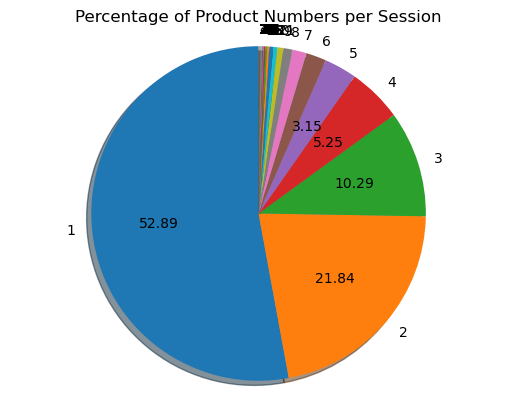

In [25]:
proportion_sessions= train_data['NoOfProducts'].value_counts()/train_data['NoOfProducts'].value_counts().sum()
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''
fig1, ax1 = plt.subplots()
ax1.set_title("Percentage of Product Numbers per Session")
ax1.pie(proportion_sessions, labels=proportion_sessions.index, autopct=my_autopct,
        shadow=True, startangle=90,normalize=False)
ax1.axis('equal')

We can see that majority of rows contain only one browsing category session (52.89%). In each session, user may view multiple products, but many of them view one product only. For the session which contains more than one product viewed, we should break the session into multiple sessions which contain only one product. This can be considered as a resampling approach, in which we create new instances for the dataset by detaching the sessions which contain more than one products to multiple instances which contain only one product.

In [26]:
train_data['Categories']=train_data['Categories'].str.split(";")

In [27]:
train_data= train_data.explode('Categories')
train_data

,Session_ID,Categories,Gender,Duration,NoOfProducts,AverageTimePerProduct,DayOfWeek_sin,DayOfWeek_cos,Day_sin,Day_cos,Month_sin,Month_cos,StartHour_sin,StartHour_cos,EndHour_sin,EndHour_cos
0,10001,A00001/B00001/C00001/D00001/,1.0,6.0,1,6.000000,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
1,10002,A00002/B00002/C00002/D24897/,1.0,1.0,1,1.000000,-0.866025,-0.5,0.651372,-0.758758,-2.449294e-16,1.000000,-6.310879e-01,-0.775711,-6.310879e-01,-0.775711
2,10003,A00002/B00002/C00002/D00002/,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
2,10003,A00002/B00002/C00003/D00003/,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
2,10003,A00002/B00002/C00007/D00007/,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14996,24997,A00002/B00002/C00007/D36051/,1.0,68.0,4,17.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917
14996,24997,A00002/B00002/C00007/D36052/,1.0,68.0,4,17.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917
14997,24998,A00002/B00002/C00007/D36054/,1.0,2.0,1,2.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917
14998,24999,A00002/B00002/C00007/D08424/,1.0,5.0,1,5.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000


each browsing session is broken down into multiple ones which contain one category. We have from 15,000 rows to 33,455 rows now

break down the category path into "Main Category", "Sub Category", "Sub Sub Category", and "Product Category" columns

In [28]:
train_data['MainCat'] = train_data['Categories'].str.split("/").str[0]
train_data['SubCat'] = train_data['Categories'].str.split("/").str[1]
train_data['SubSubCat'] = train_data['Categories'].str.split("/").str[2]
train_data['ProductCat'] = train_data['Categories'].str.split("/").str[3]
train_data

,Session_ID,Categories,Gender,Duration,NoOfProducts,AverageTimePerProduct,DayOfWeek_sin,DayOfWeek_cos,Day_sin,Day_cos,Month_sin,Month_cos,StartHour_sin,StartHour_cos,EndHour_sin,EndHour_cos,MainCat,SubCat,SubSubCat,ProductCat
0,10001,A00001/B00001/C00001/D00001/,1.0,6.0,1,6.000000,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000,A00001,B00001,C00001,D00001
1,10002,A00002/B00002/C00002/D24897/,1.0,1.0,1,1.000000,-0.866025,-0.5,0.651372,-0.758758,-2.449294e-16,1.000000,-6.310879e-01,-0.775711,-6.310879e-01,-0.775711,A00002,B00002,C00002,D24897
2,10003,A00002/B00002/C00002/D00002/,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000,A00002,B00002,C00002,D00002
2,10003,A00002/B00002/C00003/D00003/,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000,A00002,B00002,C00003,D00003
2,10003,A00002/B00002/C00007/D00007/,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,0.866025,0.000000e+00,1.000000,0.000000e+00,1.000000,A00002,B00002,C00007,D00007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14996,24997,A00002/B00002/C00007/D36051/,1.0,68.0,4,17.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917,A00002,B00002,C00007,D36051
14996,24997,A00002/B00002/C00007/D36052/,1.0,68.0,4,17.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917,A00002,B00002,C00007,D36052
14997,24998,A00002/B00002/C00007/D36054/,1.0,2.0,1,2.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.697968e-01,0.962917,-2.697968e-01,0.962917,A00002,B00002,C00007,D36054
14998,24999,A00002/B00002/C00007/D08424/,1.0,5.0,1,5.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,A00002,B00002,C00007,D08424


In [29]:
train_data.drop(columns=['Categories'], inplace = True)

turn these strings of categories into one-hot-encoding for our ML model to learn

In [30]:
def encode_and_bind(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[[feature_to_encode]].astype(str))
    res = pd.concat([original_df, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [31]:
features_to_encode = ['MainCat', 'SubCat', 'SubSubCat', 'ProductCat']
for feature in features_to_encode:
    train_data = encode_and_bind(train_data, feature)

In [32]:
train_data

,Session_ID,Gender,Duration,NoOfProducts,AverageTimePerProduct,DayOfWeek_sin,DayOfWeek_cos,Day_sin,Day_cos,Month_sin,...,ProductCat_D36109,ProductCat_D36110,ProductCat_D36111,ProductCat_D36112,ProductCat_D36113,ProductCat_D36114,ProductCat_D36115,ProductCat_D36116,ProductCat_D36117,ProductCat_D36122
0,10001,1.0,6.0,1,6.000000,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
1,10002,1.0,1.0,1,1.000000,-0.866025,-0.5,0.651372,-0.758758,-2.449294e-16,...,0,0,0,0,0,0,0,0,0,0
2,10003,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
2,10003,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
2,10003,1.0,839.0,12,69.916667,-0.866025,-0.5,0.299363,-0.954139,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14996,24997,1.0,68.0,4,17.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,...,0,0,0,0,0,0,0,0,0,0
14996,24997,1.0,68.0,4,17.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,...,0,0,0,0,0,0,0,0,0,0
14997,24998,1.0,2.0,1,2.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,...,0,0,0,0,0,0,0,0,0,0
14998,24999,1.0,5.0,1,5.000000,0.000000,1.0,-0.968077,-0.250653,-2.449294e-16,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print ("We have", len(train_data.columns.values), "features in total in our dataset!")

We have 22375 features in total in our dataset!


features is increased from 20 to 22,375 features

### Using SMOTE for the imbalanced dataset

In [34]:
print("The number of samples in the current data:", len(train_data))
print("Number of Male labels in the current data:", len(train_data[train_data['Gender']==0]))
print("Number of Female labels in the current data:", len(train_data[train_data['Gender']==1]))
print("Proportion of Male labels in the current data:", len(train_data[train_data['Gender']==0])/len(train_data))
print("Proportion of Female labels in the current data:", len(train_data[train_data['Gender']==1])/len(train_data))

The number of samples in the current data: 33455
Number of Male labels in the current data: 7071
Number of Female labels in the current data: 26384
Proportion of Male labels in the current data: 0.2113585413241668
Proportion of Female labels in the current data: 0.7886414586758332


In [35]:
y = train_data['Gender']
X = train_data.drop(columns=['Gender'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
os = SMOTE(random_state=0)
X_train_os, y_train_os=os.fit_resample(X_train, y_train)

In [38]:
print("The number of samples in the oversampled data:", len(X_train_os))
print("Number of Male labels in the oversampled data:", len(y_train_os[y_train_os==0]))
print("Number of Female labels in the oversampled data:", len(y_train_os[y_train_os==1]))
print("Proportion of Male labels in the oversampled data:", len(y_train_os[y_train_os==0])/len(X_train_os))
print("Proportion of Female labels in the oversampled data:", len(y_train_os[y_train_os==1])/len(X_train_os))

The number of samples in the oversampled data: 36906
Number of Male labels in the oversampled data: 18453
Number of Female labels in the oversampled data: 18453
Proportion of Male labels in the oversampled data: 0.5
Proportion of Female labels in the oversampled data: 0.5


we have a perfect balanced data

### Model

In [39]:
X_test=X_test.set_index('Session_ID')
X_train_os=X_train_os.set_index('Session_ID')

In [40]:
X_train_os

,Duration,NoOfProducts,AverageTimePerProduct,DayOfWeek_sin,DayOfWeek_cos,Day_sin,Day_cos,Month_sin,Month_cos,StartHour_sin,...,ProductCat_D36109,ProductCat_D36110,ProductCat_D36111,ProductCat_D36112,ProductCat_D36113,ProductCat_D36114,ProductCat_D36115,ProductCat_D36116,ProductCat_D36117,ProductCat_D36122
Session_ID,,,,,,,,,,,,,,,,,,,,,
16547,1.000000,1,1.000000,0.866025,-0.5,-0.651372,-0.758758,-5.000000e-01,0.866025,-0.269797,...,0,0,0,0,0,0,0,0,0,0
21495,75.000000,3,25.000000,-0.866025,0.5,0.937752,0.347305,-2.449294e-16,1.000000,0.942261,...,0,0,0,0,0,0,0,0,0,0
21001,330.000000,6,55.000000,0.000000,1.0,0.998717,-0.050649,-2.449294e-16,1.000000,-0.398401,...,0,0,0,0,0,0,0,0,0,0
16675,225.000000,3,75.000000,-0.866025,0.5,0.485302,-0.874347,-2.449294e-16,1.000000,0.398401,...,0,0,0,0,0,0,0,0,0,0
12848,82.000000,2,41.000000,0.866025,-0.5,-0.299363,-0.954139,-2.449294e-16,1.000000,-0.816970,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,467.000000,6,68.547999,0.866025,-0.5,-0.848644,0.528964,-5.000000e-01,0.866025,-0.972817,...,0,0,0,0,0,0,0,0,0,0
20762,3.155584,1,3.155584,0.000000,1.0,0.488116,-0.587800,-2.449294e-16,1.000000,-0.094294,...,0,0,0,0,0,0,0,0,0,0
20918,1125.000000,14,80.357143,-0.866025,0.5,-0.790776,-0.612106,-2.449294e-16,1.000000,0.816970,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train_os

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
36901    0.0
36902    0.0
36903    0.0
36904    0.0
36905    0.0
Name: Gender, Length: 36906, dtype: float64

#### Metrics

For the metrics, we will use a variety of them to provide as much as information to evaluate our models:
- Balanced Accuracy Measure (BAC) = 0.5*(tp/(tp+fn) + tn/(tn+fp))
- Normal Accuracy (True/Total) = (tp+tn)/(tp+fp+tn+fn)
- Precision, Recall, F1-score
- ROC Curve (a measure on the degree of separability of both classes by a model)

In [42]:
def model_report(model, model_name):
    y_train_pred = model.predict(X_train_os)
    y_test_pred = model.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(y_train_os, y_train_pred).ravel()
    score = 0.5*(tp/(tp+fn) + tn/(tn+fp))
    print("Balanced Accuracy Score (BAC) for train data: ", score)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    score = 0.5*(tp/(tp+fn) + tn/(tn+fp))
    print("Balanced Accuracy Score (BAC) for test data: ", score)
    
    print(f'Accuracy of {model_name} classifier on train set: {model.score(X_train_os, y_train_os)}')
    print(f'Accuracy of {model_name} classifier on test set: {model.score(X_test, y_test)}')
    
    print("Confusion Matrix for test data:")
    print(confusion_matrix(y_test, y_test_pred))
    
    print("Precision, Recall, F1-score for test data:")
    print(classification_report(y_test, y_test_pred))
    
    print("ROC Curve for test data:")
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (area = {logit_roc_auc})')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

#### Logistic Regression (Baseline Model)

Balanced Accuracy Score (BAC) for train data:  0.5000270958651709
Balanced Accuracy Score (BAC) for test data:  0.4876786583906325
Accuracy of Logistic Regression classifier on train set: 0.500027095865171
Accuracy of Logistic Regression classifier on test set: 0.45352196871575173
Confusion Matrix for test data:
[[1151  955]
 [4530 3401]]
Precision, Recall, F1-score for test data:
              precision    recall  f1-score   support

         0.0       0.20      0.55      0.30      2106
         1.0       0.78      0.43      0.55      7931

    accuracy                           0.45     10037
   macro avg       0.49      0.49      0.42     10037
weighted avg       0.66      0.45      0.50     10037

ROC Curve for test data:


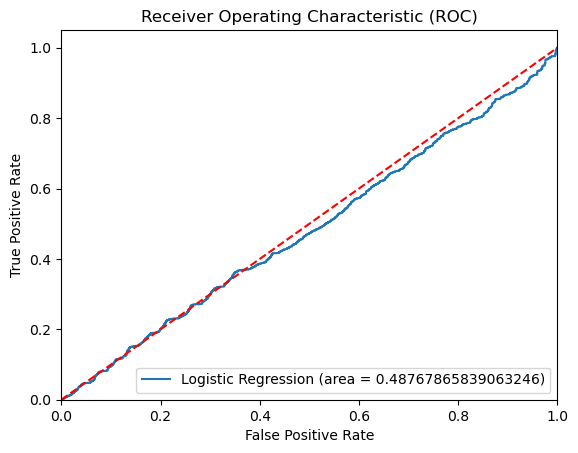

In [43]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_os, y_train_os)
model_report(logistic_model, "Logistic Regression")

#### Naive Baynes

Balanced Accuracy Score (BAC) for train data:  0.506475911775863
Balanced Accuracy Score (BAC) for test data:  0.5124547333285198
Accuracy of Naive Bayes classifier on train set: 0.506475911775863
Accuracy of Naive Bayes classifier on test set: 0.2501743548869184
Confusion Matrix for test data:
[[2031   75]
 [7451  480]]
Precision, Recall, F1-score for test data:
              precision    recall  f1-score   support

         0.0       0.21      0.96      0.35      2106
         1.0       0.86      0.06      0.11      7931

    accuracy                           0.25     10037
   macro avg       0.54      0.51      0.23     10037
weighted avg       0.73      0.25      0.16     10037

ROC Curve for test data:


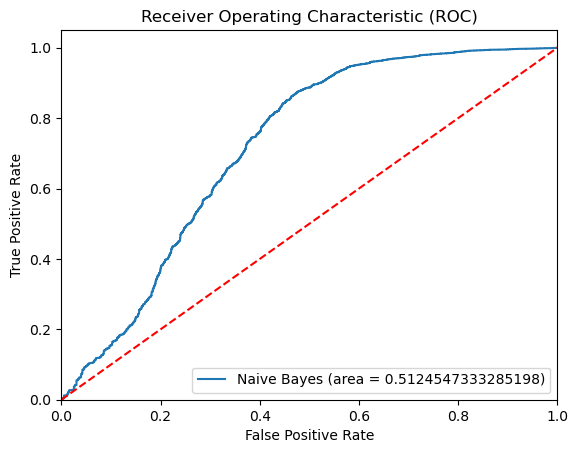

In [44]:
gnb = GaussianNB()
gnb.fit(X_train_os, y_train_os)
model_report(gnb, "Naive Bayes")

#### Decision Tree 

Balanced Accuracy Score (BAC) for train data:  0.9999729041348291
Balanced Accuracy Score (BAC) for test data:  0.8612234283755319
Accuracy of Decision Tree classifier on train set: 0.999972904134829
Accuracy of Decision Tree classifier on test set: 0.9110291919896384
Confusion Matrix for test data:
[[1633  473]
 [ 420 7511]]
Precision, Recall, F1-score for test data:
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      2106
         1.0       0.94      0.95      0.94      7931

    accuracy                           0.91     10037
   macro avg       0.87      0.86      0.86     10037
weighted avg       0.91      0.91      0.91     10037

ROC Curve for test data:


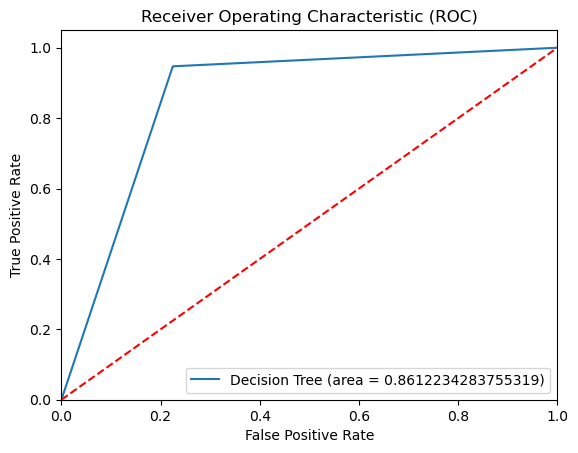

In [45]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train_os, y_train_os)
model_report(decision_tree, "Decision Tree")

#### Random Forest

Balanced Accuracy Score (BAC) for train data:  0.9999729041348291
Balanced Accuracy Score (BAC) for test data:  0.8854883879155724
Accuracy of Random Forest classifier on train set: 0.999972904134829
Accuracy of Random Forest classifier on test set: 0.933944405698914
Confusion Matrix for test data:
[[1689  417]
 [ 246 7685]]
Precision, Recall, F1-score for test data:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.84      2106
         1.0       0.95      0.97      0.96      7931

    accuracy                           0.93     10037
   macro avg       0.91      0.89      0.90     10037
weighted avg       0.93      0.93      0.93     10037

ROC Curve for test data:


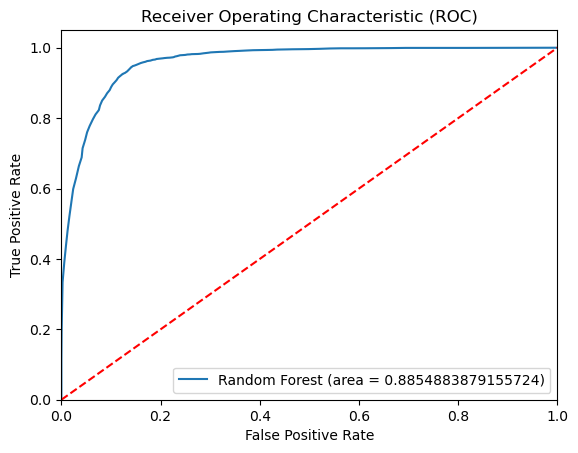

In [46]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_os, y_train_os)
model_report(random_forest, "Random Forest")